<a href="https://colab.research.google.com/github/genki3ng/ADS-Training/blob/main/EDA_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample is a subset of the population of interest. Since we cannot always measure and analyze whole population (both from resource and efficiency concerns), its recommend that you subset the population in an "**unbiased**" way and generalize the findings to whole population. 

Below are different sampling methods - that can help us alleviate this bias
1. Simple Random Sampling
2. Systematic Sampling
3. Stratified Random Sampling



In [ ]:
###Call the relevant libraries
!pip install -q umap-learn
!curl -L -O https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv

import os
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import seaborn as sns; 
import umap 
import matplotlib.colors as mcolors
from importlib import reload #for dev
import matplotlib.pyplot as plt
import matplotlib 

%matplotlib inline

     |████████████████████████████████| 81kB 2.4MB/s 
     |████████████████████████████████| 1.2MB 12.9MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  947k  100  947k    0     0  2256k      0 --:--:-- --:--:-- --:--:-- 2251k


**Loading the data and Exploratory Analysis**

In [ ]:
####Load the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df = df.replace(r'^\s$', np.nan, regex=True).dropna().reset_index() ###replace empty cells with NA
df.index.name = 'id'

In [ ]:
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,,,
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['index', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
###create dummy variables with categorical data
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

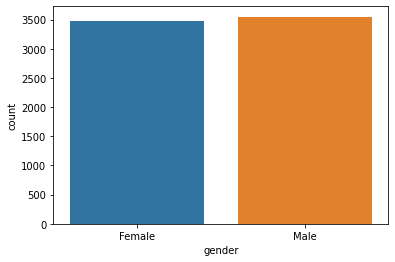

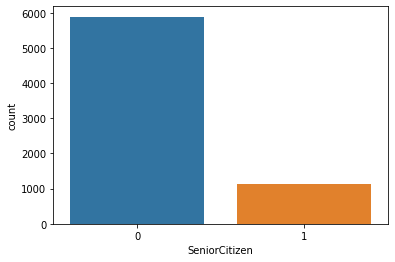

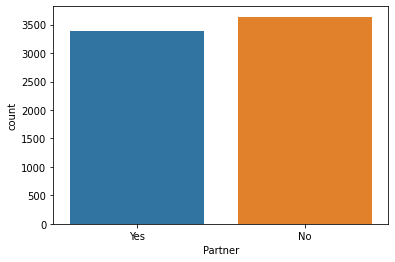

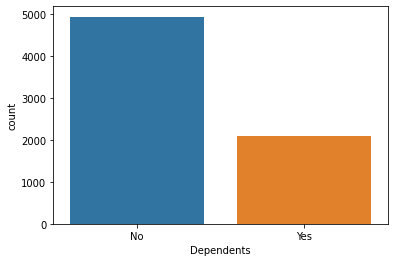

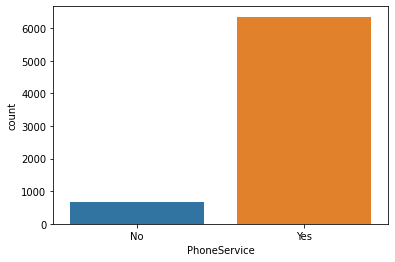

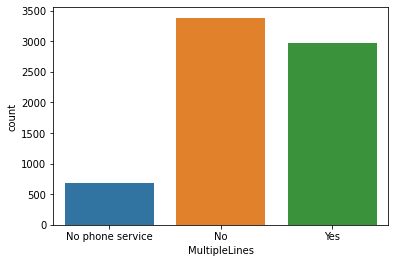

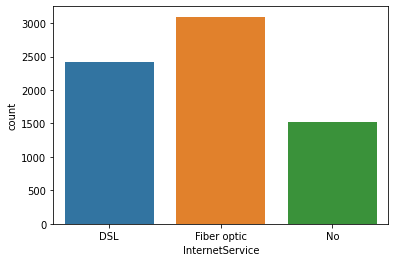

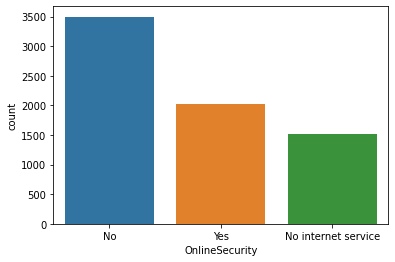

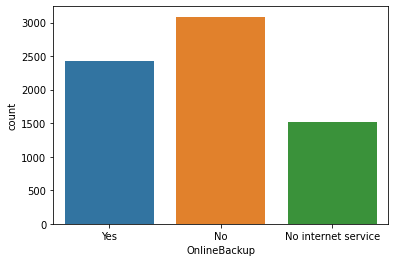

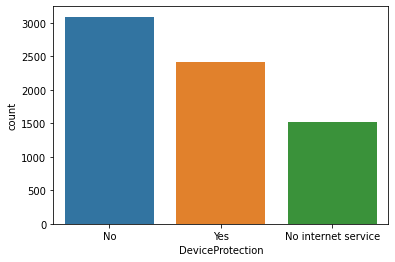

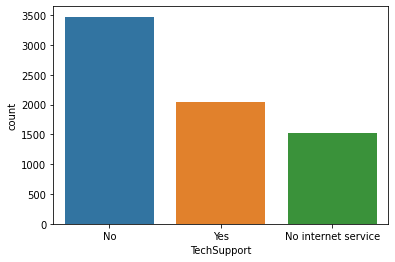

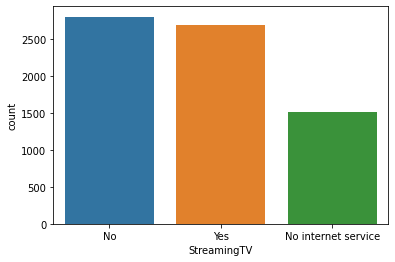

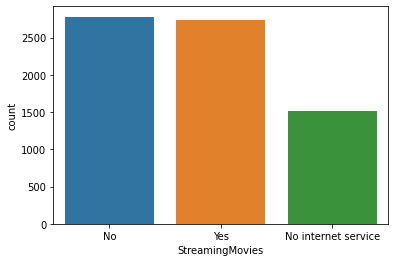

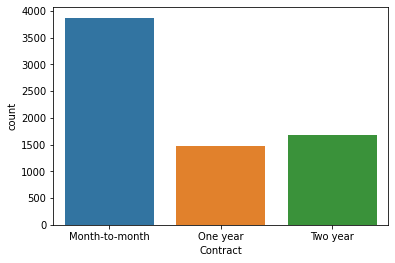

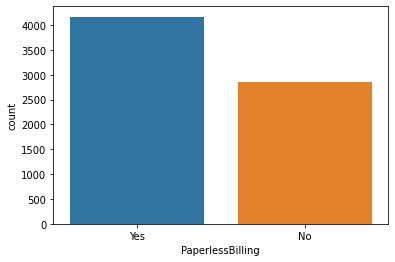

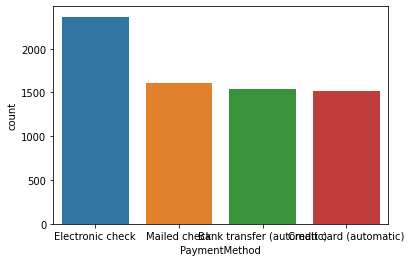

In [ ]:
for i, col in enumerate(cat_cols):
    plt.figure(i)
    sns.countplot(x=col, data=df) 

In [ ]:
###replace binary categorical values with 0 or 1
df.replace({'gender': {'Female': 1, 'Male': 0}}, inplace=True)
df.replace({'Partner': {'Yes': 1, 'No': 0}}, inplace=True)
df.replace({'Dependents': {'No': 0, 'Yes': 1}}, inplace=True)
df.replace({'PhoneService': {'Yes': 1, 'No': 0}}, inplace=True)
df.replace({'PaperlessBilling': {'Yes': 1, 'No': 0}}, inplace=True)

In [ ]:
cat_cols1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [ ]:
###Create dummy variables for categorical variables with more than two categories.
df_new1 = pd.get_dummies(df[cat_cols1], drop_first=True, prefix_sep='_')
df.drop(cat_cols1, axis=1, inplace=True)
df1 = pd.concat([df, df_new1], axis=1)
df1.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,No,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.5,No,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,Yes,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,No,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df1.columns

Index(['index', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
###change response variable to 0/1 binary values
df1.replace({'Churn': {'Yes': 1, 'No': 0}}, inplace=True)

In [ ]:
###Look at data types and convert totalcharges column to numeric 
print(df1.dtypes)
df1['TotalCharges'] = df1.TotalCharges.astype("float64")

index                                      int64
customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No 

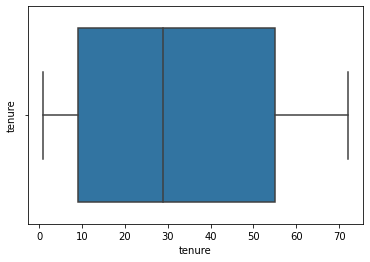

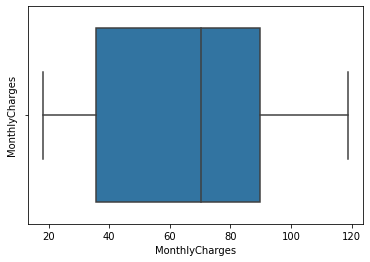

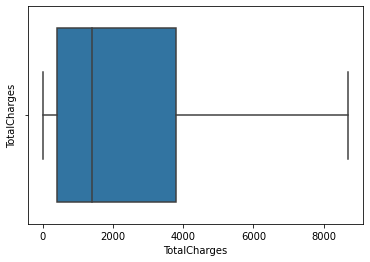

In [ ]:
###Plot the numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i, col in enumerate(num_cols):
    plt.figure(i)
    plt.ylabel(col)
    sns.boxplot(x=df1[col])
    plt.show()

In [ ]:
print(df1.columns[df1.isna().any()].tolist()) ###look for any missing data

[]


In [ ]:
print(df1.shape)

(7032, 33)


#Simple Random Sampling

The most direct method of probability sampling `df.sample(n)` or `df.sample(frac)`. The n here refers to number of rows and frac refers to proportion of data to sample. 

In [ ]:
# Obtain simple random sample (size of 1000)
simple_random_sample = df1.sample(n=1000, replace=False).sort_values(by='index')
print(simple_random_sample.shape, "\n\n")
simple_random_sample.head()

(1000, 33) 




,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,5,9305-CDSKC,1,0,0,0,8,1,1,99.65,820.50,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
9,9,6388-TABGU,0,0,0,1,62,1,0,56.15,3487.95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
13,13,0280-XJGEX,0,0,0,0,49,1,1,103.70,5036.30,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
24,24,6322-HRPFA,0,0,1,1,49,1,0,59.60,2970.30,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
31,31,4929-XIHVW,0,1,1,0,2,1,1,95.50,181.65,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
# Obtain simple random sample (size of 1000)
simple_random_sample_1 = df1.sample(frac=0.3, replace=False).sort_values(by='index')
print(simple_random_sample_1.shape, "\n\n")
simple_random_sample_1.head()

(2110, 33) 




,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8,8,7892-POOKP,1,0,1,0,28,1,1,104.80,3046.05,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
12,12,8091-TTVAX,0,0,1,0,58,1,0,100.35,5681.10,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0


**Sanity check for simple random sampling**
1. Check the distribution of response variable in the sample vs population
    a. This can be count for categorical response variable data
    b. This is mean and standard deviation for continous response variable

2. You should also look at distribution of other key variables to check for potential biases because of random selection.

Note: The greater the sample size, the better are the chances of less bias in the sampled dataset. 

In [ ]:
####Sanity checks
print("The count of response variables in population is: \n", df1.Churn.value_counts(normalize=True), "\n\n")
print("The count of response variables in n-based random sampling is: \n", simple_random_sample.Churn.value_counts(normalize=True), "\n\n")
print("The count of response variables in frac-based random sampling is: \n", simple_random_sample_1.Churn.value_counts(normalize=True), "\n\n")

The count of response variables in population is: 
 0    0.734215
1    0.265785
Name: Churn, dtype: float64 


The count of response variables in n-based random sampling is: 
 0    0.735
1    0.265
Name: Churn, dtype: float64 


The count of response variables in frac-based random sampling is: 
 0    0.71564
1    0.28436
Name: Churn, dtype: float64 




In [ ]:
###Lets say we also wanna look at tenure and totalcharges as another two important variables

###tenure
print("The population mean and standard deviation for tenure is: ")
print(df1.tenure.mean())
print(df1.tenure.std(), "\n\n")

print("The mean and standard deviation for n-based random sampling is: ")
print(simple_random_sample.tenure.mean())
print(simple_random_sample.tenure.std(), "\n\n")

print("The mean and standard deviation of frac-based random sampling is: ")
print(simple_random_sample_1.tenure.mean())
print(simple_random_sample_1.tenure.std(), "\n\n")

The population mean and standard deviation for tenure is: 
32.421786120591584
24.545259709263192 


The mean and standard deviation for n-based random sampling is: 
32.338
24.092866625252842 


The mean and standard deviation of frac-based random sampling is: 
31.565402843601895
24.58546288956849 




In [ ]:
###total charges
print("The population mean and standard deviation for total charges is: ")
print(df1.TotalCharges.mean())
print(df1.TotalCharges.std(), "\n\n")

print("The mean and standard deviation for n-based random sampling is: ")
print(simple_random_sample.TotalCharges.mean())
print(simple_random_sample.TotalCharges.std(), "\n\n")

print("The mean and standard deviation of frac-based random sampling is: ")
print(simple_random_sample_1.TotalCharges.mean())
print(simple_random_sample_1.TotalCharges.std(), "\n\n")

The population mean and standard deviation for total charges is: 
2283.3004408418697
2266.7713618831453 


The mean and standard deviation for n-based random sampling is: 
2229.7971999999986
2242.959643623818 


The mean and standard deviation of frac-based random sampling is: 
2250.3958056872048
2284.0009206263862 




#Systematic Sampling
It selects units based on a fixed sampling interval. For example, every *n*th unit is selected from a given process or population.

In [ ]:
# Define systematic sampling function
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

In [ ]:
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df1, 5)

In [ ]:
# View sampled data frame
print(systematic_sample.shape, "\n\n")
systematic_sample.head()

(1407, 33) 




,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,5,9305-CDSKC,1,0,0,0,8,1,1,99.65,820.50,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
10,10,9763-GRSKD,0,0,1,1,13,1,1,49.95,587.45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15,15,3655-SNQYZ,1,0,1,1,69,1,0,113.25,7895.15,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
20,20,8779-QRDMV,0,1,0,0,1,0,1,39.65,39.65,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
###Sanity check
print("The count of response variables in population is: \n", df1.Churn.value_counts(normalize=True), "\n\n")
print("The count of response variables in n-based random sampling is: \n", systematic_sample.Churn.value_counts(normalize=True), "\n\n")

The count of response variables in population is: 
 0    0.734215
1    0.265785
Name: Churn, dtype: float64 


The count of response variables in n-based random sampling is: 
 0    0.72779
1    0.27221
Name: Churn, dtype: float64 




# Stratified Random Sampling
It divides the population in subgroups (e.g. interface, channel groups) and selects random samples from each subgroups to maintain the same distribution of the dataset.

This is particularly relevant when you want to make sure there are no biases across multiple levels. Specially when some variables have skewed distribution.

**Note**: The function specified below only uses one stratum. You can also use multiple strata to do stratified sampling, but you will have to branch out to other libraries to achieve that (or write your own function.)

In [ ]:
# Set the split criteria
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3)

# Perform data frame split
for x, y in split.split(df1, df1['gender']):
    stratified_random_sample = df.iloc[y].sort_values(by='index')

# View sampled data frame
print(stratified_random_sample.shape, "\n\n")
stratified_random_sample.head()

(2110, 12) 




,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,
1,1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.5,No
7,7,6713-OKOMC,1,0,0,0,10,0,0,29.75,301.9,No
11,11,7469-LKBCI,0,0,0,0,16,1,0,18.95,326.8,No
12,12,8091-TTVAX,0,0,1,0,58,1,0,100.35,5681.1,No
13,13,0280-XJGEX,0,0,0,0,49,1,1,103.70,5036.3,Yes


In [ ]:
###Sanity checks

##Gender
print(df1.gender.value_counts(normalize=True), "\n\n")
print(stratified_random_sample.gender.value_counts(normalize=True), "\n\n")

##Churn
print(df1.Churn.value_counts(normalize=True), "\n\n")
print(stratified_random_sample.Churn.value_counts(normalize=True), "\n\n")


0    0.504693
1    0.495307
Name: gender, dtype: float64 


0    0.504739
1    0.495261
Name: gender, dtype: float64 


0    0.734215
1    0.265785
Name: Churn, dtype: float64 


No     0.721327
Yes    0.278673
Name: Churn, dtype: float64 


